In [27]:
#Importacion de Librerias

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer
import matplotlib.ticker as ticker
from sklearn.preprocessing import OrdinalEncoder

# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Librería para PCA
from sklearn.decomposition import PCA
# Libreria para KMeans
from sklearn.cluster import KMeans
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Librería para RandomForest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Librerías para métricas
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report,recall_score, f1_score
import scipy 
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [28]:
# Función para calcular métricas
def CalculaMetricas(variable):
    
    # Elimino los vacíos
    variable = variable[variable.isnull() == False]

    media = variable.mean()
    mediana = variable.median()
    media_recortada = scipy.stats.trim_mean(variable,0.1)
    varianza = variable.var()
    desvio = variable.std()
    primer_cuartil = variable.quantile(0.25)
    tercer_cuartil = variable.quantile(0.75)
    percentil_1 = variable.quantile(0.01)
    percentil_99 = variable.quantile(0.99)
    error_estandar = scipy.stats.sem(variable) 
    cv = scipy.stats.variation(variable)
    asimetria = scipy.stats.skew(variable) 
    curtosis = scipy.stats.kurtosis(variable)    
    
    resultado = (
        f'Medidas de Tendencia Central\n'
        f'Media: {round(media, 0)}\n'
        f'Media Recortada: {round(media_recortada, 0)}\n'
        f'Mediana: {round(mediana, 0)}\n\n'
        f'Medidas de Localización\n'
        f'Primer Cuartil: {round(primer_cuartil, 0)}\n'
        f'Tercer Cuartil: {round(tercer_cuartil, 0)}\n'
        f'Percentil 1: {round(percentil_1, 0)}\n'
        f'Percentil 99: {round(percentil_99, 0)}\n\n'
        f'Medidas de Dispersión Absolutas\n'
        f'Varianza: {round(varianza, 0)}\n'
        f'Desvío Estándar: {round(desvio, 0)}\n'
        f'Rango Intercuartílico: {round(tercer_cuartil - primer_cuartil, 0)}\n'
        f'Error Estándar: {round(error_estandar, 0)}\n\n'
        f'Medidas de Dispersión Relativas\n'
        f'Coeficiente de Variación: {round(cv, 2)}\n'
        f'Desvío Intercuartílico: {round((tercer_cuartil - primer_cuartil) / (tercer_cuartil + primer_cuartil), 2)}\n\n'
        f'Medidas de Asimetría y Curtosis\n'
        f'Coeficiente de Asimetría: {round(asimetria, 2)}\n'
        f'Coeficiente de Curtosis: {round(curtosis, 2)}'
    )

    print(resultado)

In [29]:
import requests
url = 'https://github.com/Gersmol/Data-Science/blob/main/Amazon_Sales_Report.xlsx?raw=true'
response = requests.get(url)


if response.status_code == 200:
    with open('Amazon_Sales_Report.xlsx', 'wb') as file:
        file.write(response.content)
    print("El archivo ha sido descargado y guardado exitosamente.")
else:
    print(f"Error al descargar el archivo. Código de estado HTTP: {response.status_code}")


El archivo ha sido descargado y guardado exitosamente.


In [30]:
df = pd.read_excel('Amazon_Sales_Report.xlsx')

In [31]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128754 entries, 0 to 128753
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128754 non-null  int64  
 1   Order ID            128754 non-null  object 
 2   Date                128754 non-null  object 
 3   Status              128754 non-null  object 
 4   Fulfilment          128754 non-null  object 
 5   ship-service-level  128754 non-null  object 
 6   Style               128754 non-null  object 
 7   SKU                 128754 non-null  object 
 8   Category            128754 non-null  object 
 9   Size                128754 non-null  object 
 10  ASIN                128754 non-null  object 
 11  Courier Status      121887 non-null  object 
 12  Qty                 128754 non-null  int64  
 13  currency            121083 non-null  object 
 14  Amount              121083 non-null  float64
 15  ship-city           128721 non-nul

**Comienzo con la limpieza de los datos**
---

In [33]:
df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-postal-code'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

df.dropna(subset=['currency', 'Amount'], inplace=True)
df = df[df['Amount'] != 0]

valores_faltantes_columnas = ["B2B", "fulfilled-by"]
datos_faltantes = df[valores_faltantes_columnas].isnull()

imputer = SimpleImputer(strategy='most_frequent')

df[valores_faltantes_columnas] = imputer.fit_transform(df[valores_faltantes_columnas])

# Elimino los guiones de la columna 'Order ID'
df['Order ID'] = df['Order ID'].str.replace('-', '')

# Convierto la columna a tipo numérico
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')

In [34]:
# Creo el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["Set", "kurta", "Western Dress", "Top", "Ethnic Dress", "Blouse", "Bottom", "Saree", "Dupatta"]])

# Ajusto el codificador con la variable Fulfilment y la transformamos
encoder.fit(df[["Category"]])
df["Categoria_encoded"] = encoder.transform(df[["Category"]])

In [35]:
# Creo el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["Amazon", "Merchant"]])

# Ajusto el codificador con la variable Fulfilment y la transformamos
encoder.fit(df[["Fulfilment"]])
df["Seller_encoded"] = encoder.transform(df[["Fulfilment"]])

In [36]:
df['Category'].unique()
df['Category'].value_counts()

Category
Set              45954
kurta            45854
Western Dress    14461
Top               9988
Ethnic Dress      1061
Blouse             859
Bottom             408
Saree              152
Dupatta              3
Name: count, dtype: int64

In [37]:
df['Fulfilment'].unique()
df['Fulfilment'].value_counts()

Fulfilment
Amazon      82063
Merchant    36677
Name: count, dtype: int64

**ANALIZO LA DISTRIBUCIÓN DE LA VARIABLE TARGET**
---

Text(0.5, 1.0, 'Distribución de Amount')

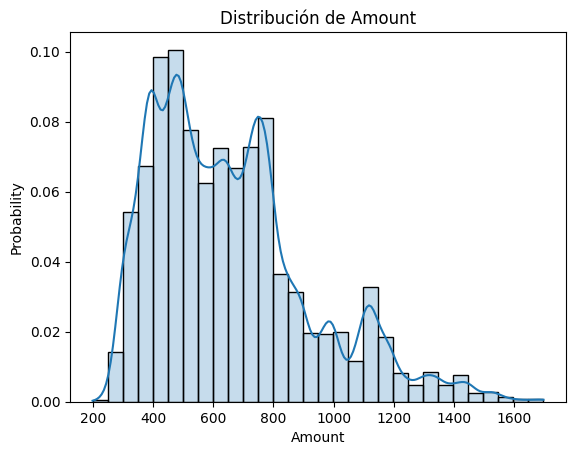

In [38]:
# Distribución de variable Amount
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Amount',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability')
plt.title('Distribución de Amount')

In [39]:
# Métricas de la variable Amount
CalculaMetricas(df['Amount'])

Medidas de Tendencia Central
Media: 660.0
Media Recortada: 631.0
Mediana: 620.0

Medidas de Localización
Primer Cuartil: 458.0
Tercer Cuartil: 788.0
Percentil 1: 292.0
Percentil 99: 1442.0

Medidas de Dispersión Absolutas
Varianza: 69916.0
Desvío Estándar: 264.0
Rango Intercuartílico: 330.0
Error Estándar: 1.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.4
Desvío Intercuartílico: 0.26

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 0.96
Coeficiente de Curtosis: 0.63


**SEPARO EL MODELO EN TEST Y TRAIN**
---

In [40]:
X = df[['Qty', 'Seller_encoded', 'Categoria_encoded']]
y = df['Amount']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [43]:
predicciones = modelo.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 63732.87687128685
R^2 Score: 0.09598250328451752


Al ver el claro ejemplo que el modelo no se ajusta a los datos consideraré aplicar la técnica PCA para reducir la dimensionalidad de los datos.

*INICIALIZO EL PCA*
---

In [45]:
df_numerico = df.select_dtypes(include=['number'])

In [46]:
df_numerico.head()

,index,Order ID,Qty,Amount,Categoria_encoded,Seller_encoded
0,0,40580787845731545,0,647.62,0.0,1.0
1,1,17191981511101146,1,406.00,1.0,1.0
2,2,40406876767273146,1,329.00,1.0,0.0
3,3,40396153778133951,0,753.33,2.0,1.0
4,4,40710697907240320,1,574.00,3.0,0.0


In [47]:
# Inicializi PCA para reducir a 2 componentes
pca = PCA(n_components=2)

# Ajusto y transformo los datos numéricos
pca_resultado = pca.fit_transform(df_numerico)

# Calculo la matriz de covarianza de los componentes principales
cov_matrix = np.cov(pca_resultado.T)

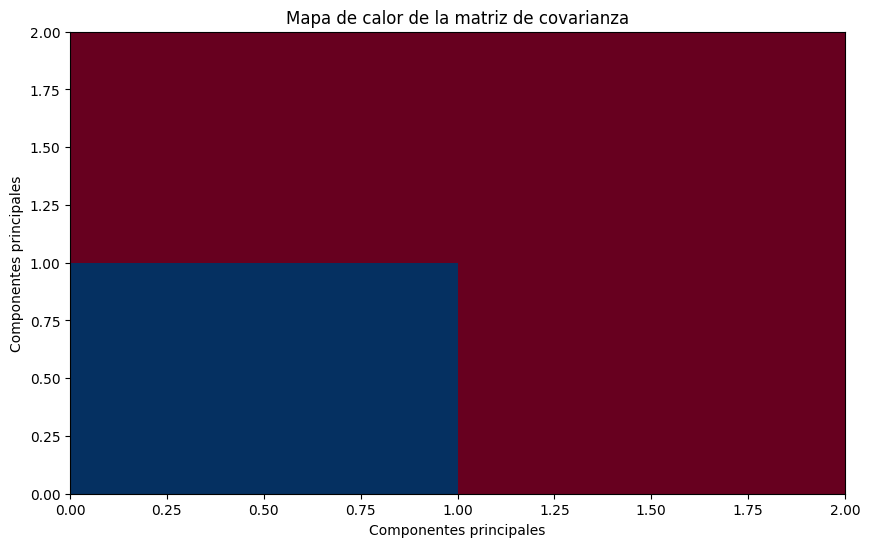

In [48]:
#Creo mapa de calor de la matriz de covarianza

fig, ax = plt.subplots(figsize=(10, 6))
heatmap = ax.pcolormesh(cov_matrix, cmap='RdBu')

ax.set_xlabel('Componentes principales')
ax.set_ylabel('Componentes principales')

plt.title('Mapa de calor de la matriz de covarianza')
plt.show()

In [49]:
# Calculo el porcentaje de varianza explicada por cada componente principal
pve = pca.explained_variance_ratio_

# Muestro el porcentaje de varianza explicada por los dos primeros componentes
print('PVE por componente 1:', pve[0])
print('PVE por componente 2:', pve[1])

# Calculo la varianza total explicada por los dos primeros componentes
total_pve = np.sum(pve[:2])

# Muestro la varianza total explicada
print('Varianza total explicada:', total_pve)

PVE por componente 1: 0.9999999999999936
PVE por componente 2: 2.3070662826364265e-23
Varianza total explicada: 0.9999999999999936


Vemos que existe un único componente principal significativo que captura la totalidad de la varianza en los datos.
El segundo componente principal no es relevant.,

In [50]:
pca = PCA(n_components=1)
pca.fit(X)

# cargas de los componentes pca
cargas = pca.components_

In [51]:
print(pca.components_)

[[0.00018694 0.00934096 0.99995635]]


Determinamos que "Seller Encoded" tiene la correlación más fuerte con el primer componente principal.

*REALIZO EL METODO DE VALIDACION CRUZADA*
----

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
X = df_numerico.drop(columns=['index', 'Order ID', 'Qty', 'Categoria_encoded', 'Seller_encoded'])
y = df_numerico['Amount']

# Divido los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Realizo la validación cruzada en el modelo
scores = cross_val_score(model, X_train, y_train, cv=5) 

In [57]:
print("Resultados de validación cruzada:", scores)
print("Promedio de resultados de validación cruzada:", np.mean(scores))

Resultados de validación cruzada: [1. 1. 1. 1. 1.]
Promedio de resultados de validación cruzada: 1.0



Los resultados de la validación cruzada muestran que el modelo tiene un rendimiento perfecto en todos los pliegues de validación cruzada, lo que nos sugiere que el modelo es capaz de generalizar bien con los datos de entrenamiento.